In [44]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio


def W_energy(EArray, xArray=None, yArray=None):
    if xArray is None or yArray is None:
        shape = np.shape(EArray)
        xArray = np.arange(shape[0])
        yArray = np.arange(shape[1])
    dx = xArray[1] - xArray[0]
    dy = yArray[1] - yArray[0]
    W = np.sum(np.conj(EArray) * EArray, axis=0) * dx * dy
    # total power
    W = np.real(np.sum(W, axis=0))
    return W


def Jz_calc_no_conj(EArray, xArray=None, yArray=None):
    EArray = np.array(EArray)
    Er, Ei = np.real(EArray), np.imag(EArray)
    if xArray is None or yArray is None:
        shape = np.shape(EArray)
        xArray = np.arange(shape[0])
        yArray = np.arange(shape[1])
    x0 = (xArray[-1] + xArray[0]) / 2
    y0 = (yArray[-1] + yArray[0]) / 2
    x = np.array(xArray) - x0
    y = np.array(yArray) - y0
    dx = xArray[1] - xArray[0]
    dy = yArray[1] - yArray[0]
    sumJz = 0
    for i in range(1, len(xArray) - 1, 1):
        for j in range(1, len(yArray) - 1, 1):
            dErx = (Er[i + 1, j] - Er[i - 1, j]) / (2 * dx)
            dEry = (Er[i, j + 1] - Er[i, j - 1]) / (2 * dy)
            dEix = (Ei[i + 1, j] - Ei[i - 1, j]) / (2 * dx)
            dEiy = (Ei[i, j + 1] - Ei[i, j - 1]) / (2 * dy)
            # dErx = (Er[i + 1, j] - Er[i, j]) / (dx)
            # dEry = (Er[i, j + 1] - Er[i, j]) / (dy)
            # dEix = (Ei[i + 1, j] - Ei[i, j]) / (dx * 2)
            # dEiy = (Ei[i, j + 1] - Ei[i, j]) / (dy)
            # print(x[i] * Er[i, j] * dEiy, - y[j] * Er[i, j] * dEix, -
            #           x[i] * Ei[i, j] * dEry, + y[j] * Ei[i, j] * dErx)
            sumJz += (x[i] * Er[i, j] * dEiy - y[j] * Er[i, j] * dEix -
                      x[i] * Ei[i, j] * dEry + y[j] * Ei[i, j] * dErx)
    # Total moment
    Jz = (sumJz * dx * dy)
    W = W_energy(EArray)
    print(f'Total OAM charge = {Jz / W}\tW={W}')
    return Jz


def linear_momentum(EArray, xArray=None, yArray=None):
    EArray = np.array(EArray)
    Er, Ei = np.real(EArray), np.imag(EArray)
    if xArray is None or yArray is None:
        shape = np.shape(EArray)
        xArray = np.arange(shape[0])
        yArray = np.arange(shape[1])
    dx = xArray[1] - xArray[0]
    dy = yArray[1] - yArray[0]
    Px = np.zeros(np.shape(Er))
    Py = np.zeros(np.shape(Er))
    print(np.shape(Px))
    for i in range(1, len(xArray) - 1, 1):
        for j in range(1, len(yArray) - 1, 1):
            dErx = (Er[i + 1, j] - Er[i - 1, j]) / (2 * dx)
            dEry = (Er[i, j + 1] - Er[i, j - 1]) / (2 * dy)
            dEix = (Ei[i + 1, j] - Ei[i - 1, j]) / (2 * dx)
            dEiy = (Ei[i, j + 1] - Ei[i, j - 1]) / (2 * dy)
            Px[i, j] = Er[i, j] * dEix - Ei[i, j] * dErx
            Py[i, j] = Er[i, j] * dEiy - Ei[i, j] * dEry
    print(f'total Px={np.sum(Px)}, total Py={np.sum(Py)}')
    return Px, Py


ticksFontSize = 18
xyLabelFontSize = 20
legendFontSize = 20


def plot_2D(E, x=None, y=None, xname='', yname='', map='jet', vmin=None, vmax=None, title='',
            ticksFontSize=ticksFontSize, xyLabelFontSize=xyLabelFontSize,
            axis_equal=False,
            xlim=None, ylim=None, ax=None):
    if x is None:
        x = range(np.shape(E)[0])
    if y is None:
        y = range(np.shape(E)[1])
    if ax is None:
        if axis_equal:
            fig, ax = plt.subplots(figsize=(6, 6))
        else:
            fig, ax = plt.subplots(figsize=(8, 6))
    image = plt.imshow(E,
                       interpolation='bilinear', cmap=map,
                       origin='lower', aspect='auto',  # aspect ration of the axes
                       extent=[y[0], y[-1], x[0], x[-1]],
                       vmin=vmin, vmax=vmax, label='sdfsd')
    cbr = plt.colorbar(image, shrink=0.8, pad=0.02, fraction=0.1)
    cbr.ax.tick_params(labelsize=ticksFontSize)
    plt.xticks(fontsize=ticksFontSize)
    plt.yticks(fontsize=ticksFontSize)
    ax.set_xlabel(xname, fontsize=xyLabelFontSize)
    ax.set_ylabel(yname, fontsize=xyLabelFontSize)
    plt.title(title, fontweight="bold", fontsize=26)
    if axis_equal:
        ax.set_aspect('equal', adjustable='box')
    if xlim is not None:
        plt.xlim(xlim[0], xlim[1])
    if ylim is not None:
        plt.ylim(ylim[0], ylim[1])
    plt.tight_layout()
    return ax


def readingFile(fileName, fieldToRead="p_charges", printV=False):
    matFile = sio.loadmat(fileName, appendmat=False)
    if printV:
        print(matFile)
        exit()
    return np.array(matFile[fieldToRead])


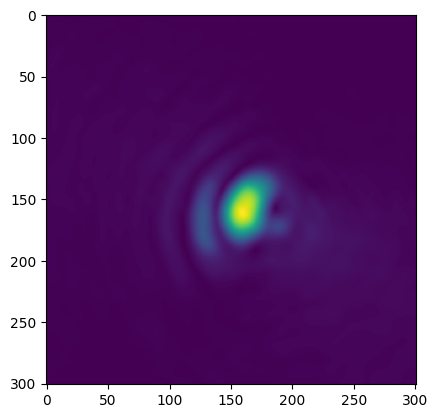

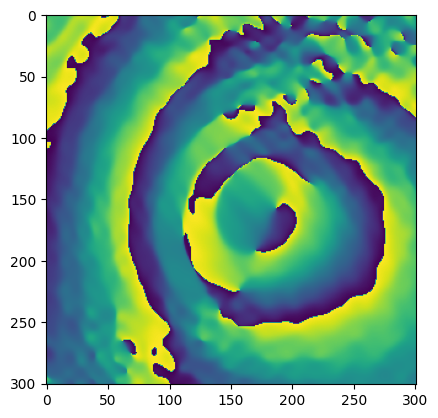

(301, 301)
total Px=-18.779473426842888, total Py=-7.409197565201573


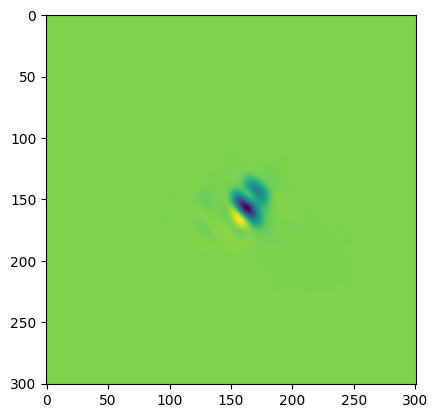

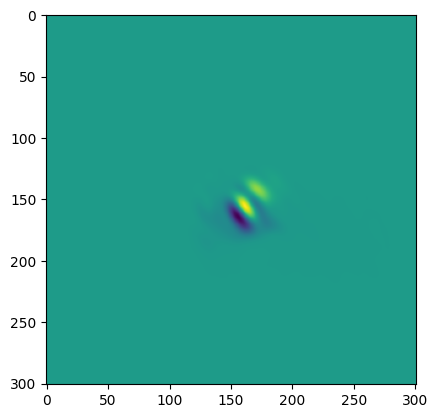

(301, 301)
total Px=-23.801887330094704, total Py=-4.023051540548239


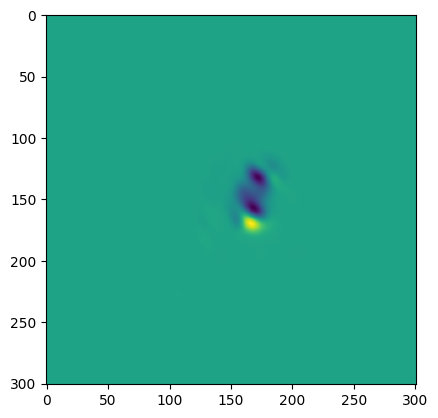

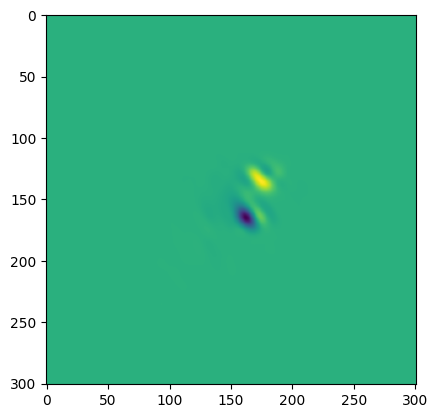

In [50]:
UH = readingFile('UH_816_0 LfieldV.mat', fieldToRead='UH')
field = UH
plt.imshow(np.abs(field))
plt.show()
plt.imshow(np.angle(field))
plt.show()
Px, Py = linear_momentum(field)
plt.imshow(Px)
plt.show()
plt.imshow(Py)
plt.show()
UV = readingFile('UV_816_0 LfieldV.mat', fieldToRead='UV')
Px, Py = linear_momentum(UV)
plt.imshow(Px)
plt.show()
plt.imshow(Py)
plt.show()

Total OAM charge = -2.1494650646755824	W=844.5548075676863
Total OAM charge = -4.896641857889781	W=749.1164544080422


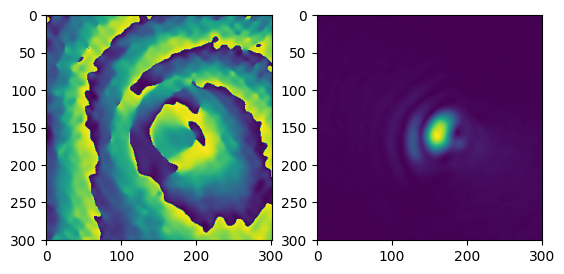

In [25]:

UH = readingFile('UH_816_0 LfieldV.mat', fieldToRead='UH')
UV = readingFile('UV_816_0 LfieldV.mat', fieldToRead='UV')

field = UV
plt.subplot(1,2,1)
plt.imshow(np.abs(field))
plt.imshow(np.angle(field))
Jz_calc_no_conj(field)
# Jz_calc_no_conj(field[70:230, 70:230])
# plt.imshow(np.abs(field[70:250, 70:250]))
# plt.show()
field = UH
plt.subplot(1,2,2)
plt.imshow(np.abs(field))
Jz_calc_no_conj(field)
plt.show()

In [5]:
field.shape

(301, 301)

In [6]:
import matplotlib.patches as patches
from matplotlib import cm
Colors=cm.jet(np.linspace(0,1,9))

Total OAM charge = -0.37212972364951075	W=837.7793290361805
Total OAM charge = -0.4983610965314324	W=746.7027709031292
-0.8163130530692698
Total OAM charge = -0.5147215430095651	W=837.5466694026593
Total OAM charge = -0.6244816568797616	W=746.7960364196613
-1.0715387846173652
Total OAM charge = -0.656625834905867	W=837.236726027367
Total OAM charge = -0.7507617005016809	W=746.8251477315102
-1.3263142282337061
Total OAM charge = -0.3436461900539733	W=838.0988634849049
Total OAM charge = -0.44793092234671134	W=746.8326051178907
-0.7427988822054038
Total OAM charge = -0.48628631021892904	W=837.8668712871349
Total OAM charge = -0.5739222154755083	W=746.9297454885201
-0.997918395250277
Total OAM charge = -0.6282142711267671	W=837.5558780845854
Total OAM charge = -0.7000833201197656	W=746.9642817816027
-1.252575281638031
Total OAM charge = -0.3156591340665176	W=838.3537713433584
Total OAM charge = -0.39758082616136803	W=746.9408262565997
-0.6698882923857997
Total OAM charge = -0.458310758530

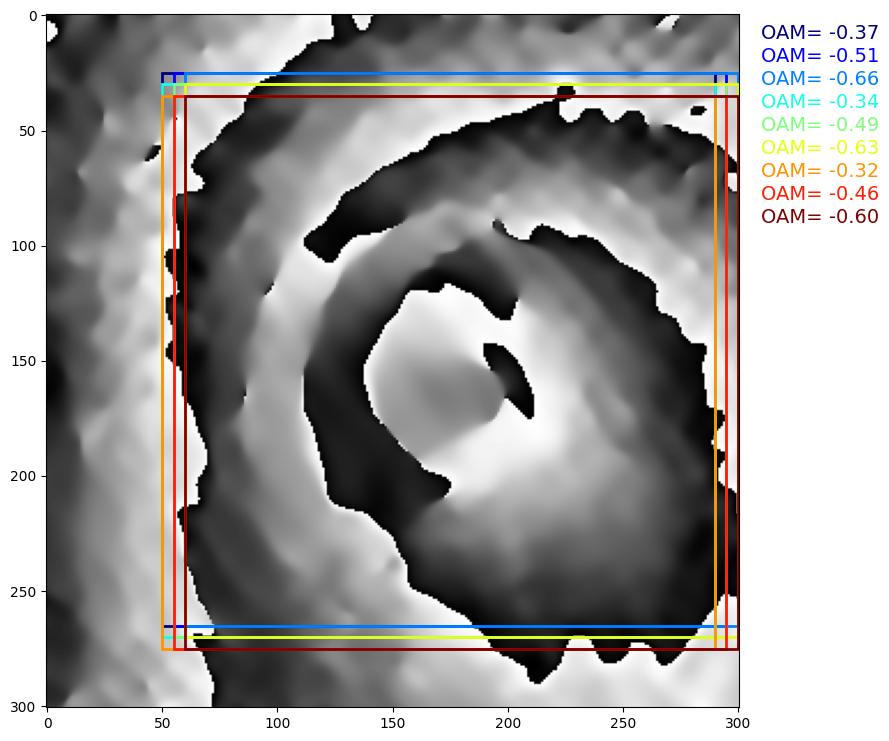

In [48]:
OV=[]
OH=[]
c1=150
c2=170
fig, ax = plt.subplots(figsize=(9,9))
plt.imshow(np.angle(UV),cmap='gray')
cutedge=120
count=0
for c1 in [145,150,155]:
    for c2 in [170, 175, 180]:
        field1 = UV[c1-cutedge:c1+cutedge,c2-cutedge:c2+cutedge]
        W1 = W_energy(field1)
        field2 = UH[c1-cutedge:c1+cutedge,c2-cutedge:c2+cutedge]
        W2 = W_energy(field1)
        # plt.imshow(np.angle(field))
        # plt.show()
        OAM1=Jz_calc_no_conj(field1)/W1
        OAM2=Jz_calc_no_conj(field2)/W2
        rect = patches.Rectangle((c2-cutedge, c1-cutedge), cutedge*2, cutedge*2, linewidth=2, edgecolor=Colors[count], facecolor='none')
        ax.add_patch(rect)
        plt.text(310, count*10+10, 'OAM= %.2f'%OAM1, fontsize=14, color=Colors[count])
        count=count+1
        print(OAM1 + OAM2)